In [25]:
#jh_wcnn_ver12.csv 

# [전화번호] 누구 인지 알려 주 세요 
#3,[전화번호] 찾아 알려
#3,[전화번호] 알려 찾아
#3,[전화번호] 누구 알려
#3,[전화번호] 누구 찾아
# 추가후  "[전화번호] 누구 인지 알려 주 세요",를 찾는지 -> 못찾음
#3,[전화번호] 누구 알려 줘
#3,[전화번호] 누구 찾아 줘
#3,[전화번호] 찾아 알려 줘
#3,[전화번호] 알려 찾아 줘 -> 안됨

#17번 수정
# 17,[조직] [날짜] 근무
# 17,[조직] [날짜] 누구
# 17,[조직] [날짜] 근무 누구
# 17,[조직] [날짜] 누구 근무 -> 못찾음

#이번엔 18번 짧게 수정
#18,[조직] [날짜] 교대근무 -> 18번을 짧게 수정하니 찾음

# "[이름] 연락처", 찾기위해서 
# 1,[직급] [이름] 연락 추가
#[이름] 전화번호 찾 아 죠

캐릭터 CNN FALSE
패딩 줄이고 -> 12
필더 5 by 5

파일을 9번으로
교육관련 패턴 추가 갔나요~

엔티티 4개 추가 8번(사람찾기) 2번 (팀장찾기) 4번 (전화걸기)

10번 엔티티 추가!!!!! 회사별 직급찾기
   
    엔코드랭스 13개로 수정

# Wide and CNN
Google 에서 발표현 Wide and Deep 을 약간 변형한 형태로 Wide(Logistic)과 Cnn(Deep)을 Combine 형태의 Network 를 개발하였다. <br> 
여기서는 자연어를 Wide and Cnn 을 사용하여 Classification 하는 것을 테스트 하고자 한다. 

In [4]:
import requests
import json, os

nn_id = 'wcnntest88'  # put some key value you want to test 77

url = "{0}:{1}".format(os.environ['HOSTNAME'] , "8000")
print("done")
train_file = '../data/wcnn_lty_14.csv'

done


In [5]:
resp = requests.get('http://' + url + '/api/v1/type/common/target/nninfo/nnid/all/' )
data = json.loads(resp.json())
return_list = []
for row in data :
    return_list.append(row['nn_id'])
print (return_list)

['logiccase3levelone100jh4', 'logiccase3levelone100jh5', 'logiccase3levelone100jh6', 'nn992799', 'logiccase3levelone100jh11', 'wcnntest10', 'wcnntest11', 'wcnntest13', 'wcnntest14', 'wcnntest15', 'wcnntest16', 'wcnntest17', 'wcnntest20', 'wcnntest21', 'wcnntest22', 'wcnntest23', 'wcnntest24', 'lstmcrf0010', 'lstmcrf011', 'wcnntest25', 'wcnntest26', 'wcnntest28', 'wcnntest29', 'wcnntest30', 'wcnntest31', 'wcnntest32', 'wcnntest33', 'wcnntest34', 'wcnntest35', 'wcnntest36', 'wcnntest37', 'wcnntest38', 'wcnntest39', 'lstmcrf0011', 'wcnntest_mj_01', 'lstmcrf0012', 'wcnntest_mj_02', 'lstmcrf0013', 'wcnntest40', 'wcnn_minjoo_cha_01', 'lstmcrf0001', 'wcnntest41', 'wcnn_minjoo_cha_02', 'wcnn_cha02', 'wcnn_cha04', 'wcnn_ksw01', 'lstmcrf0002', 'lstmcrf0003', 'wcnntest43', 'wcnntest44', 'wcnntest45', 'wcnn_ksw05', 'wcnntest46', 'wcnntest47', 'wcnntest48', 'wcnntest49', 'wcnntest50', 'wcnntest51', 'wcnntest52', 'wcnntest53', 'wcnntest55', 'wcnntest56', 'wcnntest57', 'wcnntest58', 'wcnntest60', 'wc

# 네트워크 및 그래프 버전 생성 


In [6]:
####(1) 네트워크 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/',
                     json={
                         "biz_cate": "MES",
                         "biz_sub_cate": "M60",
                         "nn_title" : "test",
                         "nn_desc": "test desc",
                         "use_flag" : "Y",
                         "dir": "purpose?",
                         "config": "N"
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

####(2) 버전 생성 ####
resp = requests.post('http://' + url + '/api/v1/type/common/target/nninfo/nnid/' + nn_id + '/version/',
                 json={
                     "nn_def_list_info_nn_id": "",
                     "nn_wf_ver_info": "test version info",
                     "condition": "1",
                     "active_flag": "Y"
                 })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


evaluation result : wcnntest88
evaluation result : wcnntest88


# 그래프 플로우 정의

In [7]:
# Work Flow 틀을 구성하도로고 지시한다. (정해진 틀을 강제로 생성)
resp = requests.post('http://' + url + '/api/v1/type/wf/target/init/mode/simple/' + nn_id +'/wfver/1/',
                     json={
                         "type": 'wcnn'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : wcnn


# 데이터 업로드

In [8]:
import os

return_dict = {}
return_dict['test'] = open(train_file, 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/data_node/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']


# 데이터 노드 정의

In [9]:
# (1) Train Data Node 의 속성을 정의
# 어디서 Source 를 어떻게 가지고 올것인지 파라메터 정의 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/data_node/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                     })

# 전처리는 어떤 것을 할지 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nn_id+'/ver/1/node/data_node/',
                      json={
                          "preprocess":  "none",
                      })
# 전처리가 완료된 데이터는 어디에 저장을 할지 
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nn_id+'/ver/1/node/data_node/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : /hoya_str_root/wcnntest88/1/data_node


# 데이터 Feeder 정의
 - encode_column : csv file 에서 encode 데이터로 사용할 컬럼명 
 - decode_column : csv file 에서 decode 데이터로 사용할 컬럼명 
 - channel : cnn Neural Net 을 공유하여 사용하기 때문에 Channel 지정 (특별한 경우가 아니면 1 고정) 
 - encode_len : encode 부에서 최대로 인지할 문장 길이 
 - vocab_size : 단어를 Vector 로 Embedding 할때 사용할 embedding Vector size <br>
   (onehot 의 경우 단어 dict size 와 같음) dict 사이즈를 초과하는 단어에 대해서는 Unknown 으로 인지함 
 - char_encode : 음소, 알파뱃 단위로 인코딩을 할 것인지 여부 
 - char_max_len : 음소 단위로 Embedding시 한단어에 포함되는 최대 음소의 길이 
 - lable_size : decode column 에 해당하는 것으로 몇개의 lable 을 사용할 것인지 지정 
 - embed_type : word embedding 을 하기위해서 사용할 embedding 알고리즘 종류 (현재는 onehot만 가능) 

In [10]:
# (2) Network 에 데이터를 Feed하는 Node 의 속성을 정의 
resp = requests.post('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/frame/net/wcnn/nnid/'+nn_id+'/ver/1/node/pre_feed_train/',
                     json={
                         "encode_column" : "encode",
                         "decode_column" : "decode",
                         "channel" : 1,
                         "encode_len" : 13,
                         "preprocess": "none",
                         "vocab_size" : 100,
                         "char_encode" : True, 
                         "char_max_len" : 5,
                         "lable_size" : 13, #총 label 수에서 3개 더해야함 
                         "embed_type" : 'onehot'
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'encode_column': 'encode', 'decode_column': 'decode', 'char_max_len': 5, 'preprocess': 'none', 'embed_type': 'onehot', 'lable_size': 13, 'encode_len': 13, 'vocab_size': 100, 'channel': 1, 'char_encode': True}


# 네트워크 정의

In [11]:
resp = requests.put('http://' + url + '/api/v1/type/wf/state/netconf/detail/wcnn/nnid/'+nn_id+'/ver/1/node/netconf_node/',
                     json={
                         "param":{"epoch": 40 #Train Iteration
                                  ,"traincnt": 1
                                  ,"batch_size":64
                                  ,"predictcnt": 10
                         },
                         "config": {"num_classes":13,
                                    "learnrate": 0.001,
                                    "layeroutputs":32,
                                    "net_type":"cnn",
                                    "eval_type":"category",
                                    "optimizer":"AdamOptimizer" #RMSPropOptimizer
                                     }
                         ,"layers": [
                                    {"active": "relu",
                                     "cnnfilter": [5, 5], # X, Y filter
                                     "cnnstride": [1, 1],
                                     "maxpoolmatrix": [2, 2],
                                     "maxpoolstride": [2, 2],
                                     "padding": "SAME",
                                     "droprate": "0.5",
                                     "layercnt":2
                                    },
                                    {"active": "relu",
                                     "cnnfilter": [5, 5],
                                     "cnnstride": [1, 1],
                                     "maxpoolmatrix": [1, 1],
                                     "maxpoolstride": [2, 2],
                                     "padding": "SAME",
                                     "droprate": "0.5",
                                     "layercnt":1
                                    }
                                   ]
                         ,"out": {"active": "softmax",
                                   "node_out": 625,
                                   "padding": "SAME"
                                }
                         ,"labels":[]
                        })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : {'param': {'epoch': 40, 'batch_size': 64, 'traincnt': 1, 'predictcnt': 10}, 'out': {'padding': 'SAME', 'node_out': 625, 'active': 'softmax'}, 'config': {'optimizer': 'AdamOptimizer', 'layeroutputs': 32, 'eval_type': 'category', 'learnrate': 0.001, 'net_type': 'cnn', 'num_classes': 13}, 'labels': [], 'layers': [{'cnnfilter': [5, 5], 'layercnt': 2, 'maxpoolstride': [2, 2], 'padding': 'SAME', 'maxpoolmatrix': [2, 2], 'active': 'relu', 'droprate': '0.5', 'cnnstride': [1, 1]}, {'cnnfilter': [5, 5], 'layercnt': 1, 'maxpoolstride': [2, 2], 'padding': 'SAME', 'maxpoolmatrix': [1, 1], 'active': 'relu', 'droprate': '0.5', 'cnnstride': [1, 1]}], 'model_path': '/hoya_model_root/wcnntest88/1/netconf_node'}


# 테스트 프로세스 정의

In [12]:
# upload files for test
return_dict = {}
return_dict['test'] = open(train_file, 'rb')

resp = requests.post('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                     files = return_dict)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 소스 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/source/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                     json={
                         "type": "csv",
                         "source_server": "local",
                         "source_sql": "all",
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 전처리 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/pre/nnid/'+nn_id+'/ver/1/node/test_data_node/',
                      json={
                          "preprocess":  "none",
                      })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

# 데이터 - 저장 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/framedata/src/local/form/raw/prg/store/nnid/'+nn_id+'/ver/1/node/test_data_node/',)

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))


# Feeder 정의
resp = requests.put('http://' + url + '/api/v1/type/wf/state/pre/detail/feed/src/frame/net/wcnn/nnid/'+nn_id+'/ver/1/node/pre_feed_test/',
                     json={
                         "encode_column" : "encode",
                         "decode_column" : "decode",
                         "channel" : 1,
                         "encode_len" : 13,
                         "preprocess": "",
                         "vocab_size" : 100,
                         "char_encode" : True, #Char CNN 사용 유무
                         "char_max_len" : 5,
                         "embed_type" : 'onehot',
                         "lable_size" : 13
                     })
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

node_name = 'eval_node'
resp = requests.put('http://' + url + '/api/v1/type/wf/state/eval/nnid/'+nn_id+'/ver/1/node/'+node_name+'/',
                    json={
                        "type": "category",
                    })

data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : ['1 file upload success']
evaluation result : {'multi_node_flag': None, 'source_path': '/hoya_src_root/wcnntest88/1/test_data_node', 'max_sentence_len': 0, 'source_type': 'local', 'drop_duplicate': False, 'source_sql': 'all', 'source_server': 'local', 'predict_path': '/hoya_src_root/wcnntest88/1/predict', 'type': 'csv', 'source_parse_type': 'raw'}
evaluation result : none
evaluation result : /hoya_str_root/wcnntest88/1/test_data_node
evaluation result : {'encode_column': 'encode', 'decode_column': 'decode', 'char_max_len': 5, 'preprocess': '', 'embed_type': 'onehot', 'lable_size': 13, 'encode_len': 13, 'vocab_size': 100, 'channel': 1, 'char_encode': True}
evaluation result : {'type': 'category'}


# Train

In [13]:
# Run All Workflow
resp = requests.post('http://' + url + '/api/v1/type/runmanager/state/train/nnid/'+nn_id+'/ver/1/')
data = json.loads(resp.json())
print("evaluation result : {0}".format(data))

evaluation result : [None, None, None, None, '', {'predicts': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 129, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'labels': ['@', '#', 'UNKNOWN', 1, 9, 2, 5, 3, 4, 6, 7, 8, 10, -1]}]


# 시각화

In [14]:
from IPython.display import display, HTML
import pandas as pd

print('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
data = json.loads(resp.json())
x= range(len(data.get('labels')))

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame(y_y)
df.columns = y

HTML(df.to_html())

http://ac78f8cefef2:8000/api/v1/type/result/nnid/wcnntest88/ver/1/


,@,#,UNKNOWN,1,9,2,5,3,4,6,7,8,10,-1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,25,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,17,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,30,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,129,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,6,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,66,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,7,0,0,0,0


# 시각화

http://ac78f8cefef2:8000/api/v1/type/result/nnid/wcnntest88/ver/1/


<IPython.core.display.Javascript object>


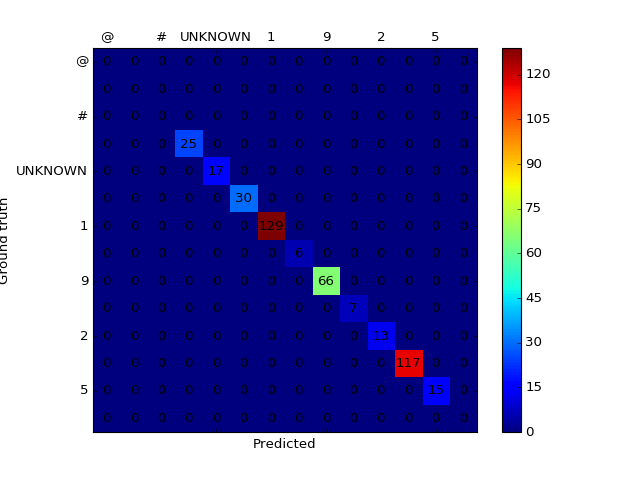

In [15]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import requests
import json, os
import matplotlib.pyplot as plt

print('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
resp = requests.get('http://' + url + '/api/v1/type/result/nnid/' + nn_id + '/ver/1/')
data = json.loads(resp.json())

y = data.get('labels')
y_y = data.get('predicts')

df = pd.DataFrame(y_y)
#df = df.transpose()
df.columns = y

labels = y
fig, ax = plt.subplots()
h = ax.matshow(df)
fig.colorbar(h)
for _r in range(len(y)):
    for _c in range(len(y)):
        ax.text(_c, _r, df.values[_r][_c], va='center', ha='center')
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Ground truth')

# Predict

In [16]:
# cha00002
from konlpy.tag import Mecab
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')
def intent_mecab(original_sentence):
 return " ".join(str(_i[0]) for _i in mecab.pos(original_sentence) if _i[1] not in ['VCP+EC','EF','EC','EP','VA','VX','XSV+EC','VX+EC','VCP+EF','ETN','ETM','JKO'])

expected_intent_no = "1"
intent_array_ori= [
"tagloc tagrank"
,"tagname 은 누구인가?"
    ,"tagname 누구"
,"tagloc tagrank 찾아줘"
,"tagloc tagrank 찾아주세요"
,"tagloc tagrank 알려주세요"
,"tagloc 에 근무하는 tagrank 찾아주면 좋겠어"
,"tagloc tagrank 검색해줄래?"
,"tagname 의 tagsuper 찾아줘"
,"tagname 의 tagsuper"
"tagname tagrank 의 tagsuper 찾아줘"
,"tagorg tagname tagrank 의 tagsuper 찾아줘"
,"tagloc 에 근무하는 tagname tagrank 의 tagsuper 검색"
,"tagloc 에 근무하는 tagname tagrank 의 tagsuper 검색해주세요"
,"tagname 의 tagrank 찾아줘"
,"tagname 의 tagrank 찾아줘"
,"tagname 의 tagrank 찾아줘"   
,"tagname 은 휴무인가요"
,"tagname 은 교육인가요"
,"tagname 은 출장인가요"
,"tagname 은 tagdate 근무하나요"
,"tagname 은 tagdate 휴가"
,"tagname 은 tagdate 근무"
,"tagname 은 해외출장인가요"
,"tagname 은 출장갔나요"
,"tagname 은 교육갔나요"
,"tagorg tagname 은 교육갔나요"
,"tagloc tagname 은 출장갔나요"
,"tagname tagrank 은 교육인가요"
,"taghead 전화걸어줘"
,"taghead 전화"
,"taghead 에게 전화걸기"
,"taghead 연결"
,"taghead 에게 연락"
,"tagname 전화걸어줘"
,"tagname tagrank 전화걸어줘"
,"tagloc tagname 전화걸어줘"
,"tagloc 에 근무하는 tagname 직원 전화걸어줘"
,"tagcompany tagname 전화걸어줘"
,"tagorg tagname 전화걸어줘"
,"tagloc tagorg tagname tagrank 전화걸기"
,"tagceo 찾아주면 감사하겠습니다."
,"taghead 찾아줘"
,"tagname 검색"
,"tagname tagrank 검색"
,"tagloc tagname 검색"
,"tagloc 에 근무하는 tagname 직원 검색"
,"tagcompany tagname 검색"
,"tagorg tagname 검색"
,"tagorg tagname tagrank 검색"
,"tagloc tagorg tagname tagrank 찾아줘"
,"tagloc tagrank 찾아줘"
,"tagloc tagrank 찾아줄래 씨발"
,"tagname tagrank 전화번호 검색"  
,"tagloc tagorg tagname 전화번호 찾아죠"
,"tagloc 에 근무하는 tagrank 찾아줄"
,"tagloc 에 근무 하 tagrank 찾"
    ,"tagname tagrank 전화번호 검색"
    ,"tagname tagrank 전화번호 검색"
    ,"tagname 의 tagsuper 누구"
    ,"tagname tagrank 근무 하나요"
    ,"tagname tagrank 근무 인가"
    ,"tagname tagrank 근무 하나요"
    ,"tagname tagrank 근무 하나요"
    ,"tagname tagrank"
    ,"tagrank tagname"
    ,"tagcompany tagname"
    ,"tagname 의 tagsuper"
    ,"tagname"
    ,"taghead 전화해"
    ,"tagorg tagname 의 tagsuper 를 찾아죠" 
    ,"tagloc tagname 은 근무"
    ,"tagname근무 ?"
    ,"tagloc tagorg tagrank 찾아죠"
    ,'(포항) tagname tagrank 근무 하나요'
        ,"tagcompany tagrank"
]
# intent_array= [ "[이름] 의 [담당임원]"
#                   ]
intent_array_mecab = [intent_mecab(_s) for _s in intent_array_ori]

intent_array = zip(intent_array_ori,intent_array_mecab )

for ori, intent in intent_array :    
    resp = requests.post('http://' + url + '/api/v1/type/service/state/predict/type/wcnn/nnid/'+nn_id+'/ver/active/', json={"input_data" : intent })
    data = json.loads(resp.json())
    print("ori : [{0}]     mecab : [{1}] ---> evaluation result intent No {2}".format(ori,intent,data ))
    #print( ori + "     "   +intent + "\t\t\t\t\t evaluation result("+ expected_intent_no + ") : {0}".format(data)) 
    #print( ori + "     "   +intent + "\t\t\t\t\t evaluation result("+ expected_intent_no + ") : {0}".format(data)) 

print("END")

ori : [tagloc tagrank]     mecab : [tagloc tagrank] ---> evaluation result intent No [1]
ori : [tagname 은 누구인가?]     mecab : [tagname 은 누구 ?] ---> evaluation result intent No [8]
ori : [tagname 누구]     mecab : [tagname 누구] ---> evaluation result intent No [8]
ori : [tagloc tagrank 찾아줘]     mecab : [tagloc tagrank 찾] ---> evaluation result intent No [1]
ori : [tagloc tagrank 찾아주세요]     mecab : [tagloc tagrank 찾 세요] ---> evaluation result intent No [10]
ori : [tagloc tagrank 알려주세요]     mecab : [tagloc tagrank 알려 세요] ---> evaluation result intent No [10]
ori : [tagloc 에 근무하는 tagrank 찾아주면 좋겠어]     mecab : [tagloc 에 근무 하 tagrank 찾] ---> evaluation result intent No [1]
ori : [tagloc tagrank 검색해줄래?]     mecab : [tagloc tagrank 검색 줄래 ?] ---> evaluation result intent No [10]
ori : [tagname 의 tagsuper 찾아줘]     mecab : [tagname 의 tagsuper 찾] ---> evaluation result intent No [2]
ori : [tagname 의 tagsupertagname tagrank 의 tagsuper 찾아줘]     mecab : [tagname 의 tagsupertagname tagrank 의 tagsuper 찾] --

In [18]:
from konlpy.tag import Mecab

def _pad_predict_input(self, input_tuple, word_len):
    """
    pad chars for prediction
    :param input_tuple:
    :return:
    """
    try :
        pad_size = word_len - (len(input_tuple) + 1)
        if(pad_size >= 0 ) :
            input_tuple = pad_size * [('#', '')] + input_tuple[0: word_len -1] + [('SF', '')]
        else :
            input_tuple = input_tuple[0: word_len-1] + [('SF', '')]
        return input_tuple
    except Exception as e:
        raise Exception(e)
mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')

pos = mecab.pos('파이썬에서 형태소 분석하기.')
x_input = '파이썬에서 형태소 분석하기.'

#print(type(pos))
#help(pos)
# print (mecab.pos('[이름] 의 [담당임원] 알고싶은데 알지 말지 잘 모르겠지 ?'))
# print (mecab.pos('에 근무조는 누구?'))
# print (mecab.pos('알려죠'))
# print (mecab.pos('에 근무하는 교대근무자는'))
# print (mecab.pos('알려'))
# print (mecab.pos('인가요?'))
# print (mecab.pos('전화걸어줘'))
# print (mecab.pos('전화해'))
# print (mecab.pos('전화한'))
print (mecab.pos('이일호 차장의 팀장 조회'))
# print (mecab.pos('근무조는 누구'))
# print (mecab.pos('궁금'))
# print (mecab.pos('해줄래?'))
# print (mecab.pos('찾아주세요'))
# print (mecab.pos('찾은'))
# print (mecab.pos('알려주세요'))
# print (mecab.pos('연락 한 사람 찾아죠'))
# print (mecab.pos('알려줄수있을까'))
# print (mecab.pos('연락처'))
#print (mecab.pos('전화 걸어 주 세 요'))
#print (mecab.pos('인가요?'))
#print (mecab.pos('검색 했으면 좋겠어'))


print(mecab.pos("tagorg tagname 의 tagsuper 를 찾아죠"))


#type(mecab.pos('검색 했으면 좋겠어')[0])




# for word_tuple in _pad_predict_input(mecab.pos(x_input), word_len):
#     if (len(word_tuple[1]) > 0):
#         word = ''.join([word_tuple[0], "/", word_tuple[1]])
#     else:
#         word = word_tuple[0]
#     word_list.append(word)
# print(word_list)


[('이일호', 'NNP'), ('차장', 'NNP'), ('의', 'JKG'), ('팀장', 'NNG'), ('조회', 'NNG')]
[('tagorg', 'SL'), ('tagname', 'SL'), ('의', 'JKG'), ('tagsuper', 'SL'), ('를', 'JKO'), ('찾', 'VV'), ('아', 'EC'), ('죠', 'NNP')]


In [78]:
from konlpy.tag import Mecab

#'VCP+EC'   'VCP+EF'
def intent_mecab(original_sentence):
 return " ".join(str(_i[0]) for _i in mecab.pos(original_sentence) if _i[1] not in ['SSC','SSO','EC','EP','VA','VX','XSV+EC','VX+EC','VCP+EF','ETN','ETM'])

# intent_array= [ "tagloc tagrank 찾 아 죠",
#                "tagloc tagrank 찾 아 주 면",
#                "tagloc tagrank 찾 아 주 면",
#                 "tagloc tagrank 찾 아 주 주 주 주 주 주 주",
#                "주 주 주 주 주 주 주 주 주 주 주",
#                "tagloc tagrank 찾 자",
#                 "tagloc 근무 찾 아",
#                 "tagloc tagrank 알아",
#                "tagloc tagrank 검색해줄래?",
#                 "tagloc 근무 알아",
#                 "tagorg tagname tagrank 의 tagsuper 알려 죠",
#                 "tagorg tagname tagrank 의 tagsuper 알려 줬 으면",
#                 "tagorg tagname tagrank 검색 했 으면 좋 겠 어",
#                 "tagname 휴무 인가",
#                 "tagname 휴무",
#                 "tagdate 교육 tagname 인가요 ?",
#                 "tagname 전화 걸 어",
#                 "tagname 전화 걸 어 주 세 요",
#                  "tagrank tagname 전화 걸 어",
#                 "tagrank 찾 아 죠",
#                 "tagname 찾 아 죠",
#                "tagname tagrank 의 tagsuper 찾아줘"
#             ]

mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')
intent_array= [ 
"tagname tagrank 누구예요?"
            ]


conv_sen = [intent_mecab(_s) for _s in intent_array]
print(conv_sen)
combinelist = zip(intent_array,conv_sen )
#print(conv_sen)
#print(intent_array)
#print(list(combinelist))


# x = ('asdad','NNG')
# print(x)
# print(x[1])
# #for _l in mecab.pos('검색 했으면 좋겠어'):
# #    print(_l[0])
    
# y = 'dfsdfsdf'
# yd = "'dfsdfsdf'"
# print(yd.replace("'",''))
# #lst_c = list(filter(lambda x : x[0]  if x[1] not in ['EC','EP','VA','VX'] else None, mecab.pos('tagorg tagname tagrank 의 tagsuper 알려 줬 으면')))


# list_d = list(_i[0] for _i in mecab.pos('tagorg tagname tagrank 의 tagsuper 알려 줬 으면') if _i[1] not in ['EC','EP','VA','VX'])

# list_dt = " ".join(str(_i[0]) for _i in mecab.pos('tagorg tagname tagrank 의 tagsuper 알려 줬 으면') if _i[1] not in ['EC','EP','VA','VX'])

# #sss = " ".join(str(_l) for _l in list_d)

# print(list_dt)

# #sss = mecab.pos('tagorg tagname tagrank 의 tagsuper 알려 줬 으면')
# #print(sss)



['tagname tagrank 누구 ?']
